As a short Python example, let’s generate QPSK at baseband and plot the constellation.

Even though we could generate the complex symbols directly, let’s start from the knowledge that QPSK has four symbols at 90-degree intervals around the unit circle. We will use 45, 135, 225, and 315 degrees for our points. First we will generate random numbers between 0 and 3 and perform math to get the degrees we want before converting to radians.

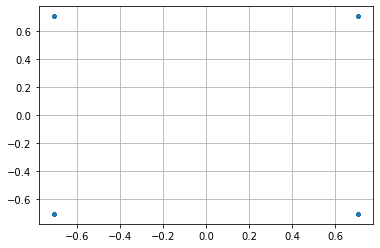

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_symbols = 1000

x_int = np.random.randint(0, 4, num_symbols) # 0 to 3
x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
x_radians = x_degrees*np.pi/180.0 # sin() and cos() takes in radians
x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) # this produces our QPSK complex symbols
plt.plot(np.real(x_symbols), np.imag(x_symbols), '.')
plt.grid(True)
plt.show()

Observe how all the symbols we generated overlap. There’s no noise so the symbols all have the same value. Let’s add some noise:

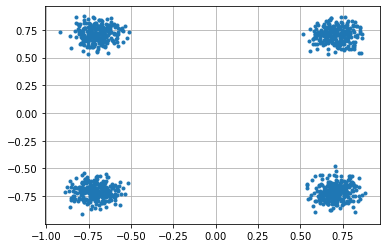

In [4]:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
r = x_symbols + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

Consider how additive white Gaussian noise (AGWN) produces a uniform spread around each point in the constellation. If there’s too much noise then symbols start passing the boundary (the four quadrants) and will be interpreted by the receiver as an incorrect symbol. Try increasing noise_power until that happens.

For those interested in simulating phase noise, which could result from phase jitter within the local oscillator (LO), replace the r with:

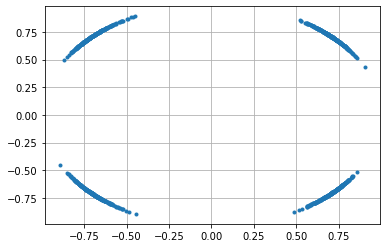

In [7]:
phase_noise = np.random.randn(len(x_symbols)) * 0.1 # adjust multiplier for "strength" of phase noise
r = x_symbols * np.exp(1j*phase_noise)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

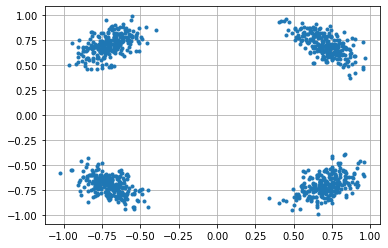

In [8]:
#You could even combine phase noise with AWGN to get the full experience:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
phase_noise = np.random.randn(len(x_symbols)) * 0.1 # adjust multiplier for "strength" of phase noise
r = x_symbols * np.exp(1j*phase_noise)  + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

We’re going to stop at this point. If we wanted to see what the QPSK signal looked like in the time domain, we would need to generate multiple samples per symbol (in this exercise we just did 1 sample per symbol). You will learn why you need to generate multiple samples per symbol once we discuss pulse shaping. The Python exercise in the Pulse Shaping chapter will continue where we left off here.